## 문제59. 원하는 사진을 흑백으로 변경하시오!

    컬러사진 : RGB (3가지 색깔)
    흑백사진 : Gray (1가지 색깔)

In [70]:
j = 'c://data/king_bob.jpeg'
import numpy as np    # 신경망에 사진을 입력할때 숫자행렬로 입력해야하기 때문에 필요
import matplotlib.pyplot as plt   # 사진을 파이썬에서 시각화하기 위해 필요
import matplotlib.image as mpimg   # 사진을 불러와서 숫자로 변환해주기 위해 필요

def rgb2gray(rgb):   # 흑백으로 색깔을 변경하기 위한 함수
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])   # [행,열,색조] -> [...,:3] = [:,:,:]
                                                        # (320, 320, 3) 와 [0.299, 0.587, 0.114] 내적
img = mpimg.imread(j)   # 사진을 숫자로 변경
img  # 행렬 출력

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

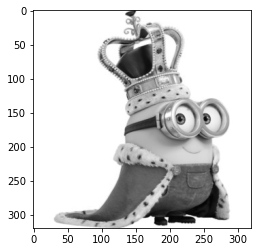

In [71]:
gray = rgb2gray(img)   # 컬러를 흑백으로 변환
plt.imshow(gray, cmap = plt.get_cmap('gray'))    # 시각화 합니다.
plt.show()

## 문제60. 원하는 사진을 흑백으로 변경하고 1차원으로 flatten 시키시오

In [13]:
j = 'c://data/king_bob.jpeg'
import numpy as np    # 신경망에 사진을 입력할때 숫자행렬로 입력해야하기 때문에 필요
import matplotlib.pyplot as plt   # 사진을 파이썬에서 시각화하기 위해 필요
import matplotlib.image as mpimg   # 사진을 불러와서 숫자로 변환해주기 위해 필요

def rgb2gray(rgb):   # 흑백으로 색깔을 변경하기 위한 함수
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])   # [행,열,색조] -> [...,:3] = [:,:,:]
                                                        # (320, 320, 3) 와 [0.299, 0.587, 0.114] 내적
img = mpimg.imread(j)   # 사진을 숫자로 변경
img  # 행렬 출력

gray = rgb2gray(img)   # 컬러를 흑백으로 변환
gray.flatten().shape   # 신경망에 입력해주기위해 1차원으로 변경

(102400,)

# ■ 필기체 데이터를 인식하는 3층 신경망 구현하기

편향 ?   
뉴런이 얼마나 쉽게 활성화(결과로 1을 출력) 하느냐를 조정하는 매개변수 입니다. 학습이 되면서 가중치 처럼 다시 변경이 됩니다.

<common.py>

In [ ]:
import numpy as np

def init_network():
    network = {}  # 비어있는 딕셔너리 생성
    network['W1'] = np.array([[1,3,5], [2,4,6]])
    network['W2'] = np.array([[3,4], [5,6], [7,8]])
    network['W3'] = np.array([[4,5], [6,7]]) 
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1, 0.2])
    network['b3'] = np.array([0.1, 0.2])
    return network

# 신경망 함수들
def sigmoid(x):
    return 1 / (1 + np.exp(-x) )

def softmax(a):
    C = np.max(a)
    minus = a - C
    exp_a = np.exp(minus)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [1]:
import numpy as np
from common import init_network, sigmoid, softmax

# 가중치 값을 불러온다.
network = init_network()
w1, w2, w3 = network['W1'], network['W2'], network['W3']
b1, b2, b3 = network['b1'], network['b2'], network['b3']

# 0층
x = np.array( [1,2] )

# 1층
y = np.dot(x,w1) + b1
y_hat = sigmoid(y)

# 2층
z = np.dot(y_hat, w2) + b2
z_hat = sigmoid(z)

# 3층
k = np.dot(z_hat, w3) + b3
k_hat = softmax(k)
print(k_hat)

[0.10909685 0.89090315]


# ■ 저자가 만들어온 가중치 피클파일을 이해하기 위한 사전 작업 

 힘들게 신경망을 학습시켜서 만들어 놓은 가중치를 파일로 생성하는 방법  
  
  "pickle 을 이용하면 됩니다."

## 예제1. pickle 파일을 생성하는 예제

In [5]:
import pickle

a = ['a', 'b', 'c']   # 학습시켜서 만든 가중치 값이라고 하면

with open("c:\\data\\a.pkl", "wb") as f:
    pickle.dump(a, f)

## 예제2. pickle 파일을 파이썬으로 로드하는 예제

In [6]:
with open("c:\\data\\a.pkl", "rb") as f:
    data = pickle.load(f)

print(data)

['a', 'b', 'c']


# ■ 저자가 이미 만들어온 가중치(w) 와 바이어스(b) 가 들어있는 pickle 파일을 파이썬으로 불러와서 가중치와 바이어스의 shape 를 확인하는 방법

In [11]:
import pickle

def init_network():
    with open('c:\\data\\sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

network = init_network()
print(network.keys())
print( network['W1'].shape )   # 은닉 1층의 노드수
print( network['W2'].shape )   # 은닉 2층의 노드수
print( network['W3'].shape )   # 출력층 3층의 노드수

dict_keys(['b2', 'W1', 'b1', 'W2', 'W3', 'b3'])
(784, 50)
(50, 100)
(100, 10)


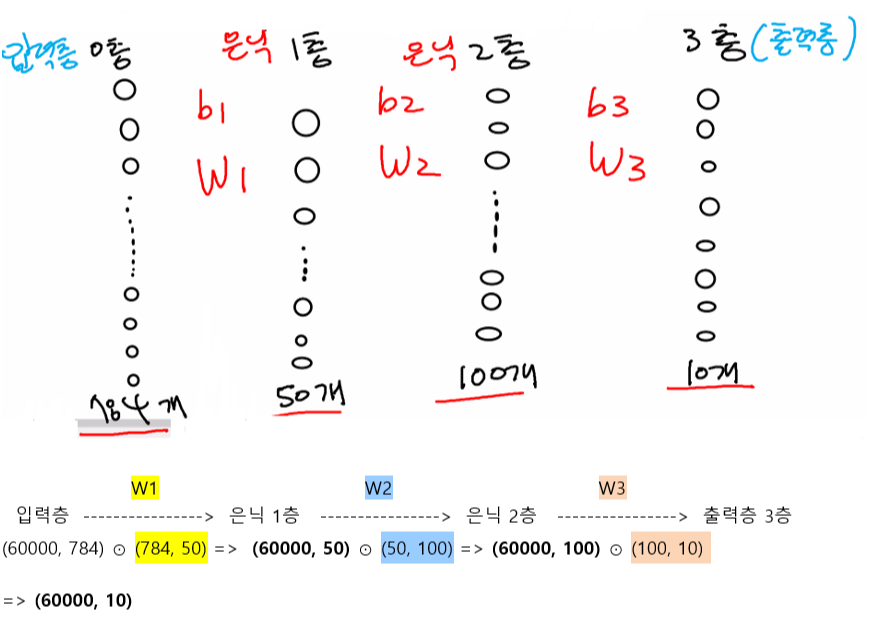

<common.py>

In [ ]:
import numpy as np
import pickle

def init_network():
    with open('c:\\data\\sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

# 신경망 함수들
def sigmoid(x):
    return 1 / (1 + np.exp(-x) )

def softmax(a):
    C = np.max(a)
    minus = a - C
    exp_a = np.exp(minus)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [6]:
import numpy as np
from common import init_network, sigmoid, softmax

# 가중치 값을 불러온다.
network = init_network()
w1, w2, w3 = network['W1'], network['W2'], network['W3']
b1, b2, b3 = network['b1'], network['b2'], network['b3']

network = init_network()
print(network['W1'].shape)

(784, 50)


# ■ 필기체 데이터를 불러오는 코드

In [1]:
import numpy as np
from common import init_network, sigmoid, softmax
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, 
                                                    one_hot_label=False)

print(t_train[0:10])

[5 0 4 1 9 2 1 3 1 4]


In [2]:
import numpy as np
from common import init_network, sigmoid, softmax
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, 
                                                    one_hot_label=True)

print(t_train[0:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


설명: one_hot_label 은 정답을 숫자로 표현할걸지 아니면 아래와 같이 one hot encoding 할건지를 결정하는 파라미터입니다. False 면 그냥 2로 표현.

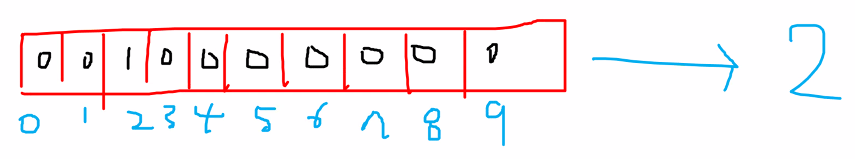

# ■ 필기체 데이터 10개를 3층 신경망에 흘려보내서 예측값을 출력해보기

In [5]:
import numpy as np
from common import init_network, sigmoid, softmax
from dataset.mnist import load_mnist

# 1. 데이터를 불러옵니다.
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, 
                                                    one_hot_label=False)

# 2. 가중치와 바이어스 값을 불러옵니다. (저자가 미리 학습 시킨 가중치와 바이어스)
network = init_network()
w1, w2, w3 = network['W1'], network['W2'], network['W3']
b1, b2, b3 = network['b1'], network['b2'], network['b3']


# 3. 신경망을 구성합니다.
# 0층
x = x_train[0:10]   # 일단 10개의 필기체 데이터를 구성합니다.

# 1층
y = np.dot(x,w1) + b1
y_hat = sigmoid(y)

# 2층
z = np.dot(y_hat, w2) + b2
z_hat = sigmoid(z)

# 3층
k = np.dot(z_hat, w3) + b3
k_hat = softmax(k)
print(np.argmax(k_hat, axis=1))  # axis=1 이 축

[5 0 4 1 9 2 1 3 1 4]


## 문제61. 위의 예측한 10장 중에 실제로 몇개를 맞췄는지 확인해보세요

In [6]:
print(np.argmax(k_hat, axis=1))  # 예측
print(t_train[0:10])  # 실제 정답

[5 0 4 1 9 2 1 3 1 4]
[5 0 4 1 9 2 1 3 1 4]


## 문제62. 이번에는 훈련 데이터 총 100장을 흘려보내고 100개중에 몇개를 맞추었는지 확인하시오 !

In [34]:
import numpy as np
from common import init_network, sigmoid, softmax
from dataset.mnist import load_mnist

# 1. 데이터를 불러옵니다.
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, 
                                                    one_hot_label=False)

# 2. 가중치와 바이어스 값을 불러옵니다. (저자가 미리 학습 시킨 가중치와 바이어스)
network = init_network()
w1, w2, w3 = network['W1'], network['W2'], network['W3']
b1, b2, b3 = network['b1'], network['b2'], network['b3']


# 3. 신경망을 구성합니다.
# 0층
x = x_train[0:100]   # 일단 100개의 필기체 데이터를 구성합니다.

# 1층
y = np.dot(x,w1) + b1
y_hat = sigmoid(y)

# 2층
z = np.dot(y_hat, w2) + b2
z_hat = sigmoid(z)

# 3층
k = np.dot(z_hat, w3) + b3
k_hat = softmax(k)
print(np.argmax(k_hat, axis=1))  # axis=1 이 축

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 3 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 5 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 2 7 1 6
 3 0 2 1 1 7 8 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]


In [35]:
a = np.argmax(k_hat, axis=1)  # 예측값
b = t_train[0:100]  # 실제 정답

print('총', len(b), '개 중에서', sum(a==b), '개 맞췄습니다!')

총 100 개 중에서 96 개 맞췄습니다!


# ■ 3장의 책 100페이지에 나온 코드가 3장의 내용을 완성하는 코드

 " 저자가 만들어온 가중치와 바이어스를 이용해서 신경망을 만들고 필기체 데이터를 잘 예측하는지 확인하는 코드 "

     1. 파이썬 기초 ---> 2. 함수를 생성 ---> 3. 함수로 클래스를 생성

In [40]:
import numpy as np
from common import init_network, sigmoid, softmax
from dataset.mnist import load_mnist

# 1. 데이터를 불러옵니다. (얀르쿤 교수님이 만든 필기체 데이터)
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, 
                                                    one_hot_label=False)
    return x_test, t_test

# 2. 가중치와 바이어스 값을 불러와서 3층 신경망에 흘려보내는 함수
def predict(network, x):
    #network = init_network()
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    # 신경망을 구성합니다.
    # 0층
    #x = x_train[0:100]   # 일단 100개의 필기체 데이터를 구성합니다.

    # 1층
    y = np.dot(x,w1) + b1
    y_hat = sigmoid(y)

    # 2층
    z = np.dot(y_hat, w2) + b2
    z_hat = sigmoid(z)

    # 3층
    k = np.dot(z_hat, w3) + b3
    k_hat = softmax(k)
    return k_hat

# 3. 위에서 만든 get_data 함수와 predict 함수를 가져다가 실행하는 코드

x, t = get_data()   # 테스트 데이터와 테스트 데이터의 정답을 불러오는 코드
network = init_network()  # 저자가 만들어온 가중치와 바이어스를 불러오는 코드

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print('정확도', accuracy_cnt / len(x))

정확도 0.9352


## 문제63. 10000장 전체를 다 돌리지 말고 1000장 돌려서 정확도를 확인하시오 !

In [44]:
import numpy as np
from common import init_network, sigmoid, softmax
from dataset.mnist import load_mnist

# 1. 데이터를 불러옵니다. (얀르쿤 교수님이 만든 필기체 데이터)
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, 
                                                    one_hot_label=False)
    return x_test, t_test

# 2. 가중치와 바이어스 값을 불러와서 3층 신경망에 흘려보내는 함수
def predict(network, x):
    #network = init_network()
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    # 신경망을 구성합니다.
    # 0층
    #x = x_train[0:100]   # 일단 100개의 필기체 데이터를 구성합니다.

    # 1층
    y = np.dot(x,w1) + b1
    y_hat = sigmoid(y)

    # 2층
    z = np.dot(y_hat, w2) + b2
    z_hat = sigmoid(z)

    # 3층
    k = np.dot(z_hat, w3) + b3
    k_hat = softmax(k)
    return k_hat

# 3. 위에서 만든 get_data 함수와 predict 함수를 가져다가 실행하는 코드

x, t = get_data()   # 테스트 데이터와 테스트 데이터의 정답을 불러오는 코드
network = init_network()  # 저자가 만들어온 가중치와 바이어스를 불러오는 코드

accuracy_cnt = 0
for i in range(1000):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print('정확도', accuracy_cnt / 1000 )

정확도 0.932


## 문제64. 훈련데이터 6만장을 다 불러와서 신경망에 넣고 전체 6만개중에 몇개를 맞추는지 정확도를 확인하시오 !

In [5]:
import numpy as np
from common import init_network, sigmoid, softmax
from dataset.mnist import load_mnist

# 1. 데이터를 불러옵니다. (얀르쿤 교수님이 만든 필기체 데이터)
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, 
                                                    one_hot_label=False)
    return x_train, t_train

# 2. 가중치와 바이어스 값을 불러와서 3층 신경망에 흘려보내는 함수
def predict(network, x):
    #network = init_network()
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    # 신경망을 구성합니다.
    # 0층
    #x = x_train[0:100]   # 일단 100개의 필기체 데이터를 구성합니다.

    # 1층
    y = np.dot(x,w1) + b1
    y_hat = sigmoid(y)

    # 2층
    z = np.dot(y_hat, w2) + b2
    z_hat = sigmoid(z)

    # 3층
    k = np.dot(z_hat, w3) + b3
    k_hat = softmax(k)
    return k_hat

# 3. 위에서 만든 get_data 함수와 predict 함수를 가져다가 실행하는 코드

x, t = get_data()   # 훈련 데이터와 훈련 데이터의 정답을 불러오는 코드
network = init_network()  # 저자가 만들어온 가중치와 바이어스를 불러오는 코드

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print('정확도', accuracy_cnt / len(x))

정확도 0.9357666666666666


## 문제65. 위의 코드에 1번과 2번 부분을 클래스로 생성하시오 ! (클래스 이름: Three_nn)

In [7]:
import numpy as np
# 클래스로 생성
class Three_nn():
    import numpy as np
    from common import sigmoid, softmax
    from dataset.mnist import load_mnist
    
    def init_network(self):
        import pickle
        with open('c:\\data\\sample_weight.pkl', 'rb') as f:
            network = pickle.load(f)
        return network

    # 1. 데이터를 불러옵니다. (얀르쿤 교수님이 만든 필기체 데이터)
    def get_data(self):
        from dataset.mnist import load_mnist
        (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, 
                                                        one_hot_label=False)
        return x_train, t_train

    # 2. 가중치와 바이어스 값을 불러와서 3층 신경망에 흘려보내는 함수
    def predict(self, network, x):
        import numpy as np
        from common import sigmoid, softmax
        #network = init_network()
        w1, w2, w3 = network['W1'], network['W2'], network['W3']
        b1, b2, b3 = network['b1'], network['b2'], network['b3']

        # 신경망을 구성합니다.
        # 0층
        #x = x_train[0:100]   # 일단 100개의 필기체 데이터를 구성합니다.

        # 1층
        y = np.dot(x,w1) + b1
        y_hat = sigmoid(y)

        # 2층
        z = np.dot(y_hat, w2) + b2
        z_hat = sigmoid(z)

        # 3층
        k = np.dot(z_hat, w3) + b3
        k_hat = softmax(k)
        return k_hat

n1 = Three_nn()  # 객체화. 설계도 가지고 제품을 만든다.

x, t = n1.get_data()   # 훈련 데이터와 훈련 데이터의 정답을 불러오는 코드
network = n1.init_network()  # 저자가 만들어온 가중치와 바이어스를 불러오는 코드

accuracy_cnt = 0
for i in range(len(x)):
    y = n1.predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print('정확도', accuracy_cnt / len(x))

정확도 0.9357666666666666


## 문제66. 훈련 데이터의 첫번째 데이터를 3층 신경망에 넣고 예측값을 출력하시오

In [57]:
n1 = Three_nn()

x, t = n1.get_data()  
network = n1.init_network()  

result = n1.predict(network, x[0])
print(np.argmax(result))
print(t[0])

5
5


## 문제67. 원하는 사진을 필기체를 인식하는 3층 신경망에 넣으면 어떤 것이 출력될까?

    (1, 102400) ⊙ (784, 50)

답: 차원이 일치하지 않아서 실행되지 않습니다.

# ■ 배치처리

훈련 데이터가 6만장이나 되는데 6만장을 한번에 신경망에 넣고 학습을 시키게 되면  
컴퓨터가 메모리 사용량이 초과하게 되어 수행이 되지 않습니다.  

예: 사람이 책을 볼때도 한번에 책 한권을 동시에 볼 수 없고 한페이지 한페이지씩 보듯이  
컴퓨터도 마찬가지로 메모리가 허용하는 내에서 여러 페이지를 학습 할 수 있도록 해주는 것  

필기체 6만장을 학습할 때 1개씩 학습한다면 6만번 실행을 predict 해야합니다.  
(predict 함수를 6만법 실행)  

필기체 6만장을 학습할 때 한번에 100개씩 학습한다면 predict 함수를 몇번 실행하면 될까요 ?  
600번만 실행하면 됩니다. 

배치 처리를 해야 학습이 더 빠르게 되고 컴퓨터로 학습이 가능한 상태가 됩니다.  

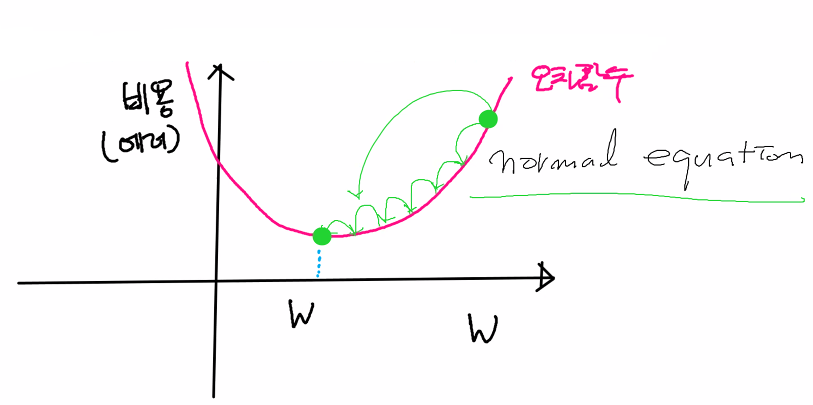

## 문제68. 지금은 훈련데이터 6만장을 한번에 predict 에 넣고 예측하는 것이었는데 그러지 말고 100개씩 넣고 예측해서 정확도 600개가 a 라는 리스트에 담기게 하시오 

In [11]:
n1 = Three_nn()

x, t = n1.get_data()  
network = n1.init_network()  

a = []
batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):   # 0, 100, 200, 300, 400, ...
    y = n1.predict(network, x[i:i+batch_size])  # x[0:100], x[100:200], ...
    y_hat = np.argmax(y, axis=1)   # 100개의 예측 숫자들이 출력됨
    a.append( sum(y_hat == t[i : i+batch_size])/100 )  # 예측 100개와 정답 100개를 비교해서 정확도를 계산

print(a)  # 600개의 정확도가 들어있다.

[0.96, 0.94, 0.9, 0.97, 0.94, 0.93, 0.92, 0.92, 0.92, 0.92, 0.88, 0.9, 0.91, 0.92, 0.97, 0.92, 0.97, 0.97, 0.97, 0.95, 0.91, 0.96, 0.94, 0.97, 0.94, 0.96, 0.95, 0.95, 0.95, 0.94, 0.92, 0.98, 0.92, 0.93, 0.97, 0.96, 0.93, 0.91, 0.97, 1.0, 0.95, 0.92, 0.94, 0.95, 0.96, 0.97, 0.9, 0.96, 0.93, 0.95, 0.97, 0.89, 0.97, 0.91, 0.97, 0.97, 0.93, 0.9, 0.93, 0.98, 0.98, 0.96, 0.95, 0.97, 0.94, 0.99, 0.96, 0.96, 0.9, 0.9, 0.9, 0.92, 0.9, 0.91, 0.96, 0.95, 0.94, 0.94, 0.88, 0.92, 0.95, 0.94, 0.89, 0.98, 0.86, 0.96, 0.88, 0.85, 0.87, 0.95, 0.97, 0.93, 0.92, 0.93, 0.92, 0.93, 0.94, 0.94, 0.95, 0.96, 0.94, 0.94, 0.86, 0.96, 0.98, 0.97, 0.98, 0.92, 0.98, 0.96, 0.96, 0.96, 0.95, 0.94, 0.94, 0.89, 0.92, 0.89, 0.93, 0.94, 0.91, 0.92, 0.94, 0.93, 0.9, 0.88, 0.88, 0.93, 0.96, 0.91, 0.85, 0.91, 0.98, 0.95, 0.96, 0.98, 0.92, 0.9, 0.94, 0.91, 0.92, 0.91, 0.9, 0.84, 0.96, 0.92, 0.91, 0.86, 0.89, 0.98, 0.95, 0.9, 0.94, 0.94, 0.96, 0.95, 0.98, 0.84, 0.94, 0.94, 0.92, 0.95, 0.95, 0.97, 0.95, 0.93, 0.91, 0.92, 0.93

In [69]:
print(len(a))
print(np.mean(a))

600
0.9357666666666665
